# <span style="color:blue">Raquel Marques</span>

Lista 02

---

## **1) Iris Dataset (3 classes de target, 150 amostras)**
Classificação — (3 classes de target, 150 amostras)

### **Exercício 1a** - Ajuste um modelo de redes neurais MLP para resolução do problema do Íris (classificação de amostras entre 3 possíveis categorias), determine a quantidade de camadas ocultas e neurônios, bem como a função de ativação da(s) camada(s) oculta(s) (sugestão: teste diferentes valores para encontrar o de melhor desempenho). Configure para utilizar early stopping e defina 500 iterações máximas.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

# Configure os parâmetros corretamente

clf = MLPClassifier(hidden_layer_sizes=(5,6), activation='relu',
                    early_stopping=True, solver='sgd', max_iter=500, random_state=42)
clf.fit(X_tr_s, y_tr)

y_pred = clf.predict(X_te_s)
print("Acurácia:", f"{accuracy_score(y_te, y_pred):.2%}")
print(classification_report(y_te, y_pred, digits=3, zero_division=1))

Acurácia: 86.67%
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      0.800     0.800     0.800        10
           2      0.800     0.800     0.800        10

    accuracy                          0.867        30
   macro avg      0.867     0.867     0.867        30
weighted avg      0.867     0.867     0.867        30



c:\Users\kel_m\anaconda3\envs\neural-network\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
print("Distribution of classes in Y_hat:\n", pd.Series(y_pred).value_counts(normalize=True), "\n")
print(y_pred, " <== predicted")
print(y_te, " <== test actual")

# Nota: O modelo raramente prevê a classe 2 corretamente.

Distribution of classes in Y_hat:
 0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64 

[0 1 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 2 2 2 2 1 0 2 0]  <== predicted
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]  <== test actual


<span style="color:lightblue">
Nota:  

Estava buscando um modelo que conseguisse me dar pelo menos predições nas 3 categorias.  
Notei que a classe 2 é quase que um evento raro e o modelo está tendendo a prever classe 1 quando na verdade seria 2.

Outro detalhe encontrado foi que ao não usar o early stopping, o modelo performa melhor. Estamos trabalhando com uma base de 150 observações, considerada pequena demais até para um modelo de Redes Neurais. Usamos o early stopping com a finalidade de evitar overfitting mas com bases pequeneas notei que ele parece fazer um underfitting de propósito.
</span>

In [57]:
# check y variable
print("Classes in y:", set(y))
print("Qty classes in y:", len(set(y)), "\n")
print("Distribution of classes in y:\n", pd.Series(y).value_counts(normalize=True), "\n")

# check y_train and y_test distribution was correctly stratified
print("Distribution of classes in y_train:\n", pd.Series(y_tr).value_counts(normalize=True), "\n")
print("Distribution of classes in y_test:\n", pd.Series(y_te).value_counts(normalize=True), "\n")

Classes in y: {np.int64(0), np.int64(1), np.int64(2)}
Qty classes in y: 3 

Distribution of classes in y:
 0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64 

Distribution of classes in y_train:
 0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64 

Distribution of classes in y_test:
 0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64 



In [43]:
# check x variable
print("Shape of X:", X.shape)
print("Describe of X:\n", pd.DataFrame(X).describe().T)

Shape of X: (150, 4)
Describe of X:
    count      mean       std  min  25%   50%  75%  max
0  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
1  150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
2  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
3  150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


### **Exercício 1b** - De acordo com o tipo de target, qual a função de custo utilizada?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Como queremos classificar em 3 possiveis categorias (tipo de íris), estamos falando de uma função de custo de multi-categorias ou seja, Categorical Cross Entropy.

</span>

### **Exercício 1c** - Qual o objetivo do parâmetro early stopping?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Como o nome já diz, vamos parar o treinamento do modelo antecipadamente. Isso é útil quando queremos evitar overfitting, já que vamos analisar o erro do modelo na base de treino e na base de teste de maneira paralela e assim que essas duas curvas começarem a descolar, ou seja, a diferença do erro entre elas começar a aumentar vamos parar. Isso geralmente é feito definindo um número de epochs consecutivas onde não houve melhora na métrica de erro escolhida. Assim, vamos pegar o melhor modelo que teve o melhor resultado até aquele ponto.
</span>


### **Exercício 1d** - Solver foi definido como "sgd", i.e. Stochastic Gradient Descent. O que é o método Gradient Descent?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
O Gradient Descent é um método que vai ajustar os parâmetros do modelo de maneira oposta a função de custo, ou seja, vamos encontrar os valores ótimos que minimizam essa função.
Assim, o gradiente vai nos dizer onde a função de custo está aumentando e para encontrar os parâmetros do modelo vamos fazer o caminho reverso.

O SGD é uma variação do Gradient Descent, onde ao invés de usar todo o conjunto de dados para fazer esse treinamento, ele vai usar uma amostra aleatória e ir fazendo o update dos parâmetros encontrados. Sendo computacionamente mais eficiente.
</span>

## **2) Progressão de Diabetes**
Regressão — (1 target numérico, 442 amostras, 10 features)

### **Exercício 2a** - Ajuste um modelo de redes neurais MLP para resolução do problema de progressão de diabetes, determine a quantidade de camadas ocultas e neurônios, bem como a função de ativação da(s) camada(s) oculta(s) (sugestão: teste diferentes valores para encontrar o de melhor desempenho). Configure para utilizar early stopping e defina 1000 iterações máximas.

In [145]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X, y = load_diabetes(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

# Configure os parâmetros corretamente
reg = MLPRegressor(hidden_layer_sizes=(25, 20, 15), activation='relu',
                   early_stopping=True, solver='adam', max_iter=1000, random_state=42)
reg.fit(X_tr_s, y_tr)


y_pred = reg.predict(X_te_s)
rmse = np.sqrt(mean_squared_error(y_te, y_pred))
print(f"Test: RMSE: {rmse:.3f}  |  R²: {r2_score(y_te, y_pred):.3f}")

y_pred_tr = reg.predict(X_tr_s)
rmse_tr = np.sqrt(mean_squared_error(y_tr, y_pred_tr))
print(f"Train: RMSE: {rmse_tr:.3f}  |  R²: {r2_score(y_tr, y_pred_tr):.3f}")


Test: RMSE: 52.236  |  R²: 0.485
Train: RMSE: 50.895  |  R²: 0.574


<span style="color:lightblue">
Testes: activarion = 'relu'

- (150, 100, 50) : RMSE: 53.902  |  R²: 0.452
- (100, 50, 25) : RMSE: 53.381  |  R²: 0.462
- (50, 25, 13) : RMSE: 60.969  |  R²: 0.298
- (50, 25,) : RMSE: 54.490  |  R²: 0.440
- (25, 15,) : RMSE: 54.425  |  R²: 0.441
- (20, 15,) : RMSE: 54.814  |  R²: 0.433
- (20, 10,) : RMSE: 55.437  |  R²: 0.420
- (25, 20, 15) : RMSE: 52.236  |  R²: 0.485  <== escolhido
- (25, 20, 16) : RMSE: 53.518  |  R²: 0.459
- (45, 10, 15) : RMSE: 54.650  |  R²: 0.436

Nota: A escolha do melhor que eu encontrei consegue explicar 48% dos dados (base de teste). Na base de treino tinhamos um R² de 57%.


Abaixo tentei fazer um grid search para achar os melhores parametros.

</span>


In [140]:
# Teste Grid Search
from sklearn.model_selection import GridSearchCV
from itertools import product

first_layer_neurons = np.arange(5, 50, 5)
second_layer_neurons = np.arange(5, 40, 5)
third_layer_neurons = np.arange(5, 30, 5)
hidden_layer_sizes = list(product(first_layer_neurons, second_layer_neurons, third_layer_neurons))

print("Qty tested: ", len(hidden_layer_sizes))
param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    # 'alpha': [0.0001, 0.001, 0.01],  # Regularização
    # 'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

mlp = MLPRegressor(early_stopping=True, max_iter=1000, solver='adam', random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_tr_s, y_tr)

print("Melhores parâmetros:", grid.best_params_)
print(f"Melhor R²: {grid.best_score_:.3f}")

Qty tested:  315
Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (np.int64(15), np.int64(20), np.int64(5))}
Melhor R²: 0.953


In [146]:
# check y variable
print("Describe of Y:\n", pd.DataFrame(y).describe().T)

Describe of Y:
    count        mean        std   min   25%    50%    75%    max
0  442.0  152.133484  77.093005  25.0  87.0  140.5  211.5  346.0


In [147]:
# check x variable
print("Shape of X:", X.shape)
print("Describe of X:\n", pd.DataFrame(X).describe().T)

Shape of X: (442, 10)
Describe of X:
    count          mean       std       min       25%       50%       75%  \
0  442.0 -2.511817e-19  0.047619 -0.107226 -0.037299  0.005383  0.038076   
1  442.0  1.230790e-17  0.047619 -0.044642 -0.044642 -0.044642  0.050680   
2  442.0 -2.245564e-16  0.047619 -0.090275 -0.034229 -0.007284  0.031248   
3  442.0 -4.797570e-17  0.047619 -0.112399 -0.036656 -0.005670  0.035644   
4  442.0 -1.381499e-17  0.047619 -0.126781 -0.034248 -0.004321  0.028358   
5  442.0  3.918434e-17  0.047619 -0.115613 -0.030358 -0.003819  0.029844   
6  442.0 -5.777179e-18  0.047619 -0.102307 -0.035117 -0.006584  0.029312   
7  442.0 -9.042540e-18  0.047619 -0.076395 -0.039493 -0.002592  0.034309   
8  442.0  9.293722e-17  0.047619 -0.126097 -0.033246 -0.001947  0.032432   
9  442.0  1.130318e-17  0.047619 -0.137767 -0.033179 -0.001078  0.027917   

        max  
0  0.110727  
1  0.050680  
2  0.170555  
3  0.132044  
4  0.153914  
5  0.198788  
6  0.181179  
7  0.185234  

<Figure size 800x400 with 0 Axes>

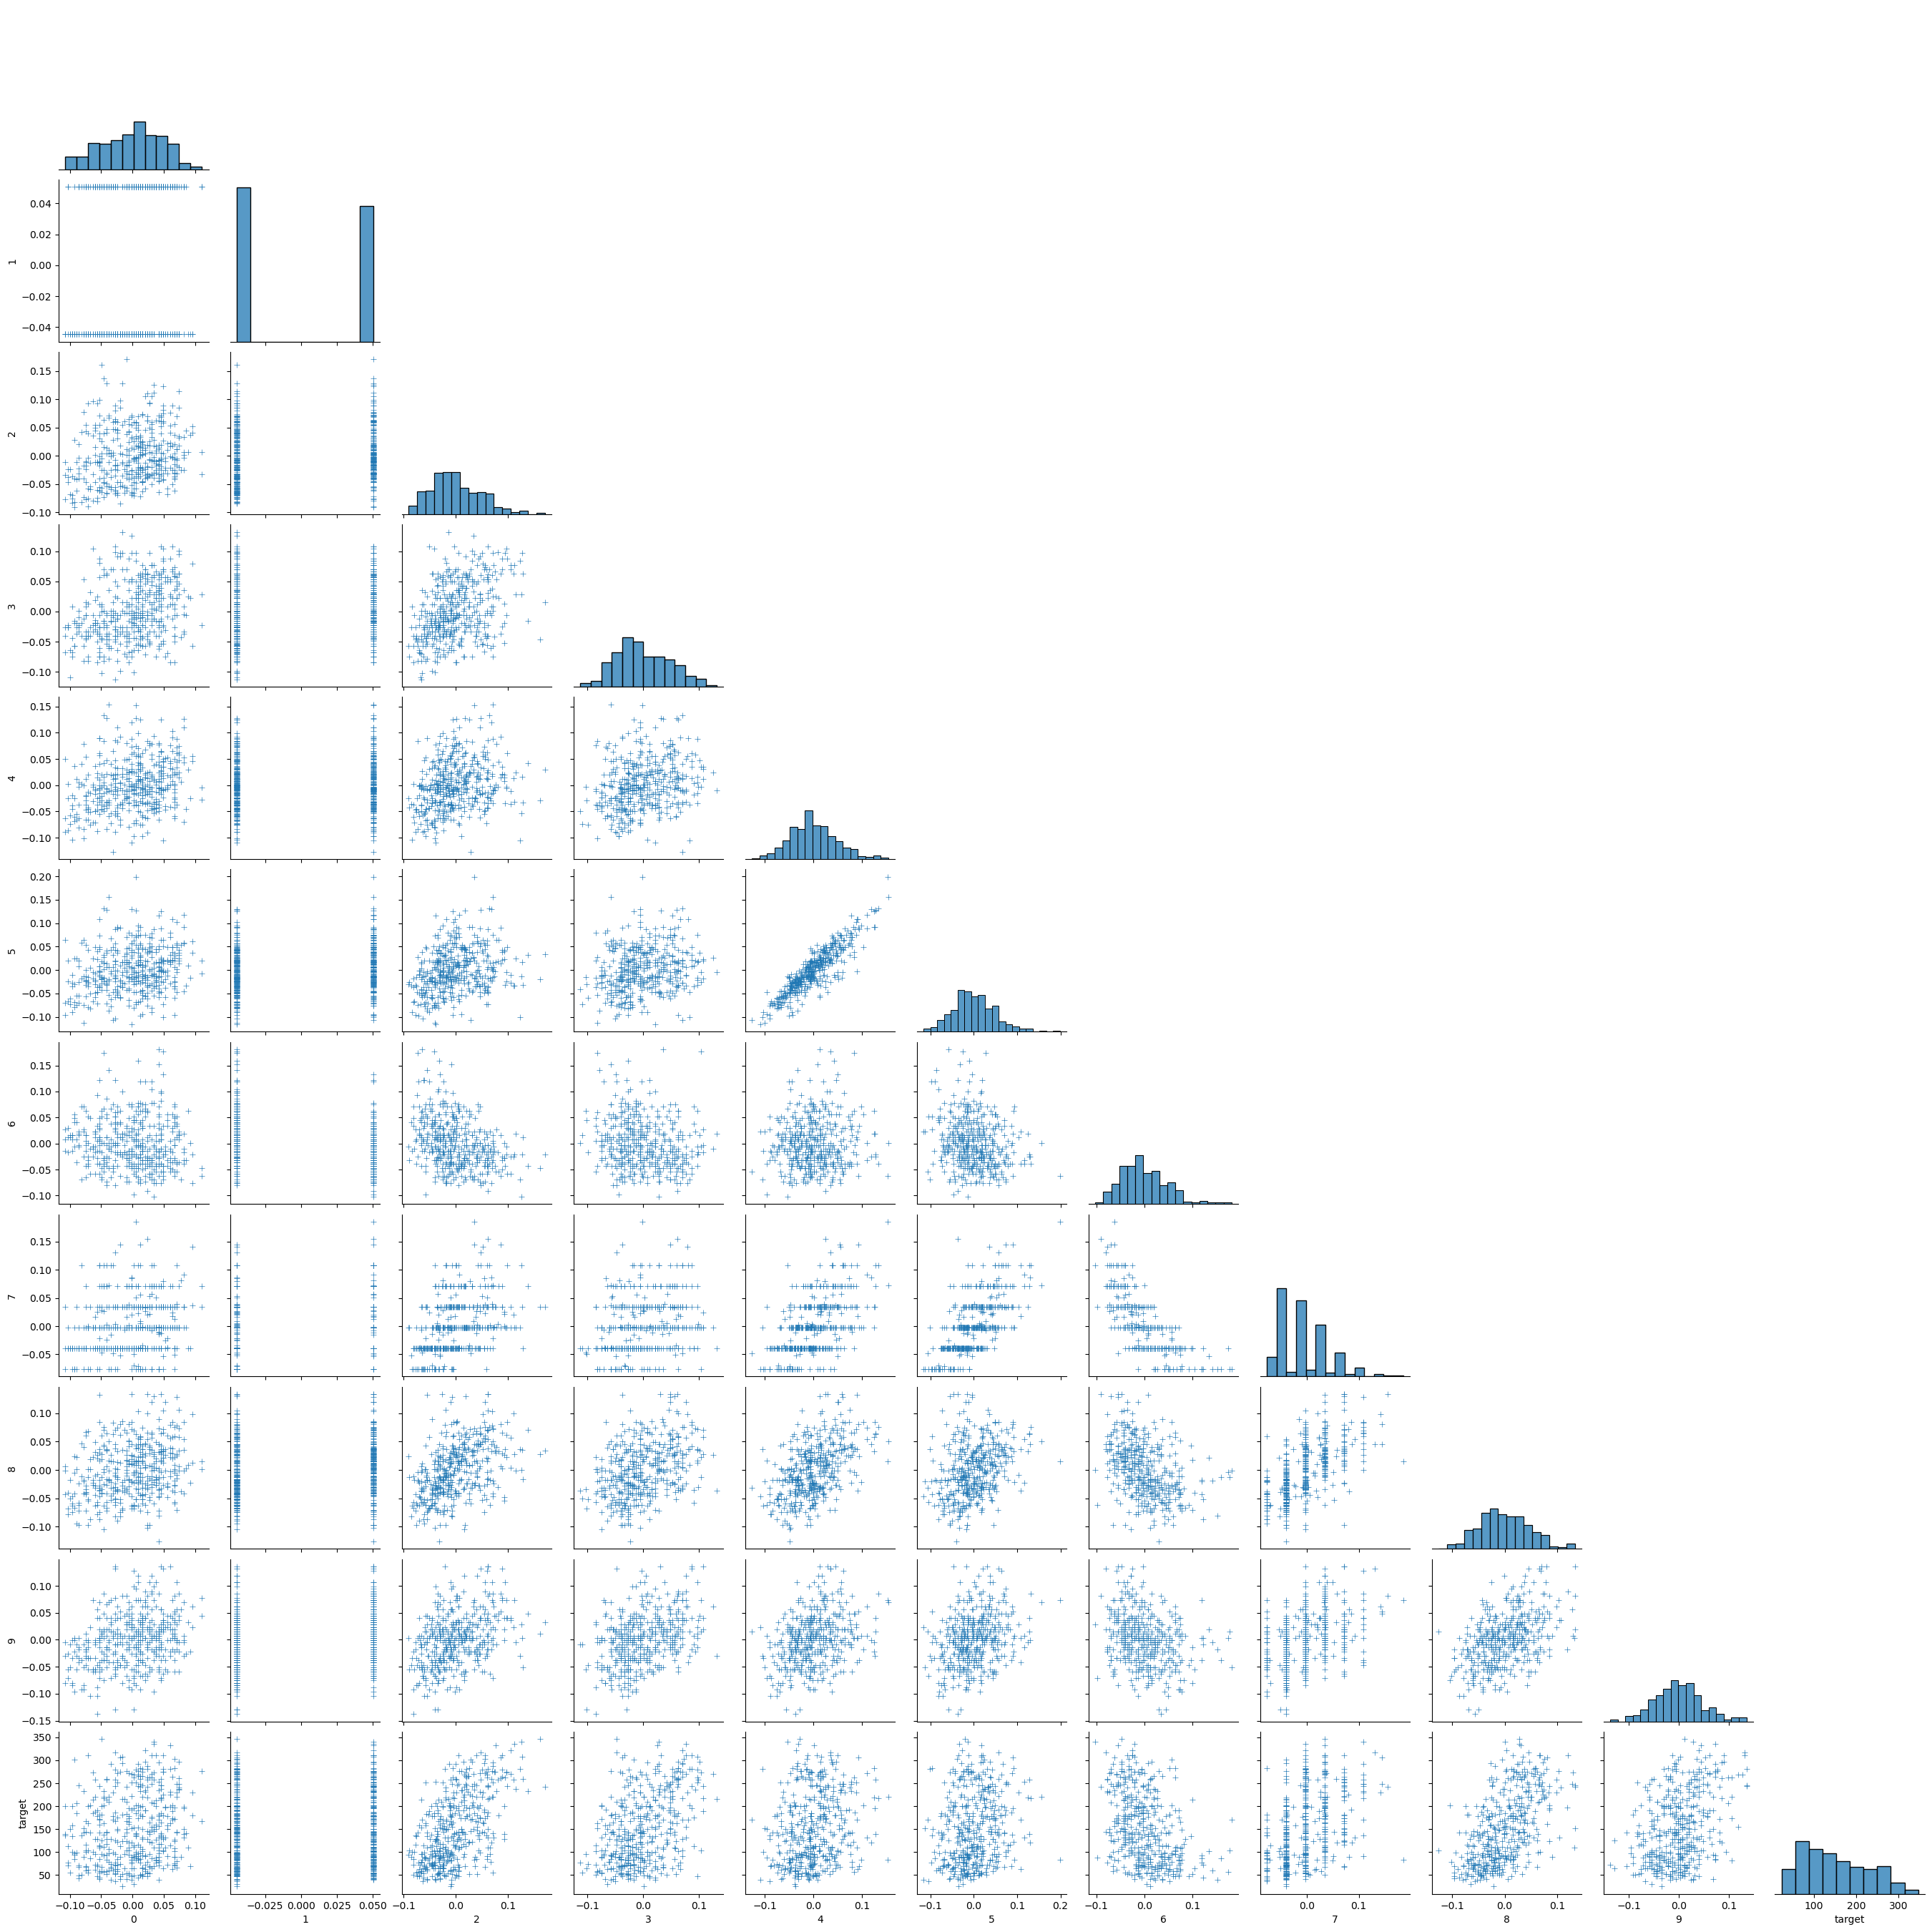

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X)
df['target'] = y

plt.figure(figsize=(8,4))
sns.pairplot(df, diag_kind='hist', markers='+', corner=True)
plt.show()


### **Exercício 2b** - De acordo com o tipo de target, qual a função de custo utilizada?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Como o nosso modelo tem como variável resposta Y quantitativo contínuo, a função de custo utilizada é o MSE (Mean Square Error) ou Erro Quadrático Médio.

 </span>

### **Exercício 2c** - Solver foi definido como "adam", i.e. Adaptative Moment Estimation. Como o algoritmo Adam se compara com o Gradient Descent?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
O Adam é superior ao Gradient Descent tradicional porque adapta automaticamente a taxa de aprendizado para cada parâmetro individualmente, combinando o conceito de momento (acelerando a convergência na direção relevante) com a adaptabilidade baseada na variância histórica dos gradientes, resultando em convergência mais rápida e estável, especialmente em problemas complexos e não-convexos como redes neurais, enquanto o GD tradicional usa uma taxa de aprendizado fixa para todos os parâmetros, tornando-o mais lento e propenso a oscilações em paisagens de erro complexas.
</span>

### **Exercício 2d** - Que técnicas de tuning de hiperparâmetro poderiam ser utilizadas para encontrar os melhores valores dos hiperparâmetros do modelo?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Existem algumas técnicas pra fazer o tuning de hiper parâmetros:

- Grid Search: dado um intervalo, todas as combinações serão testadas em busca do melhor.
- Random Search: dado um intervalo, algumas combinações serão testadas de forma aleatória.
- Bayesian Search: dado um intervalo, ele vai procurar os melhores parâmetros levando em consideração o que já foi testado, tentando otimizar a busca.
- Hyperband Search: combina o Random Search com Early Stopping, ou seja, ele começa a testar um grupo de parâmetros e se o modelo começar a não convergir ele já pára e vai para o próximo, basicamente não perdendo muito tempo com modelos que não iriam performar bem.
</span>

## **3) Análise de Curva de Aprendizado**
Imagine um cenário no qual um modelo esteja sendo treinado usando gradient descent, e a convergência do erro esteja ocorrendo de forma muito lenta, conforme observa-se na imagem abaixo, que sugere que ainda existe espaço para redução do erro.



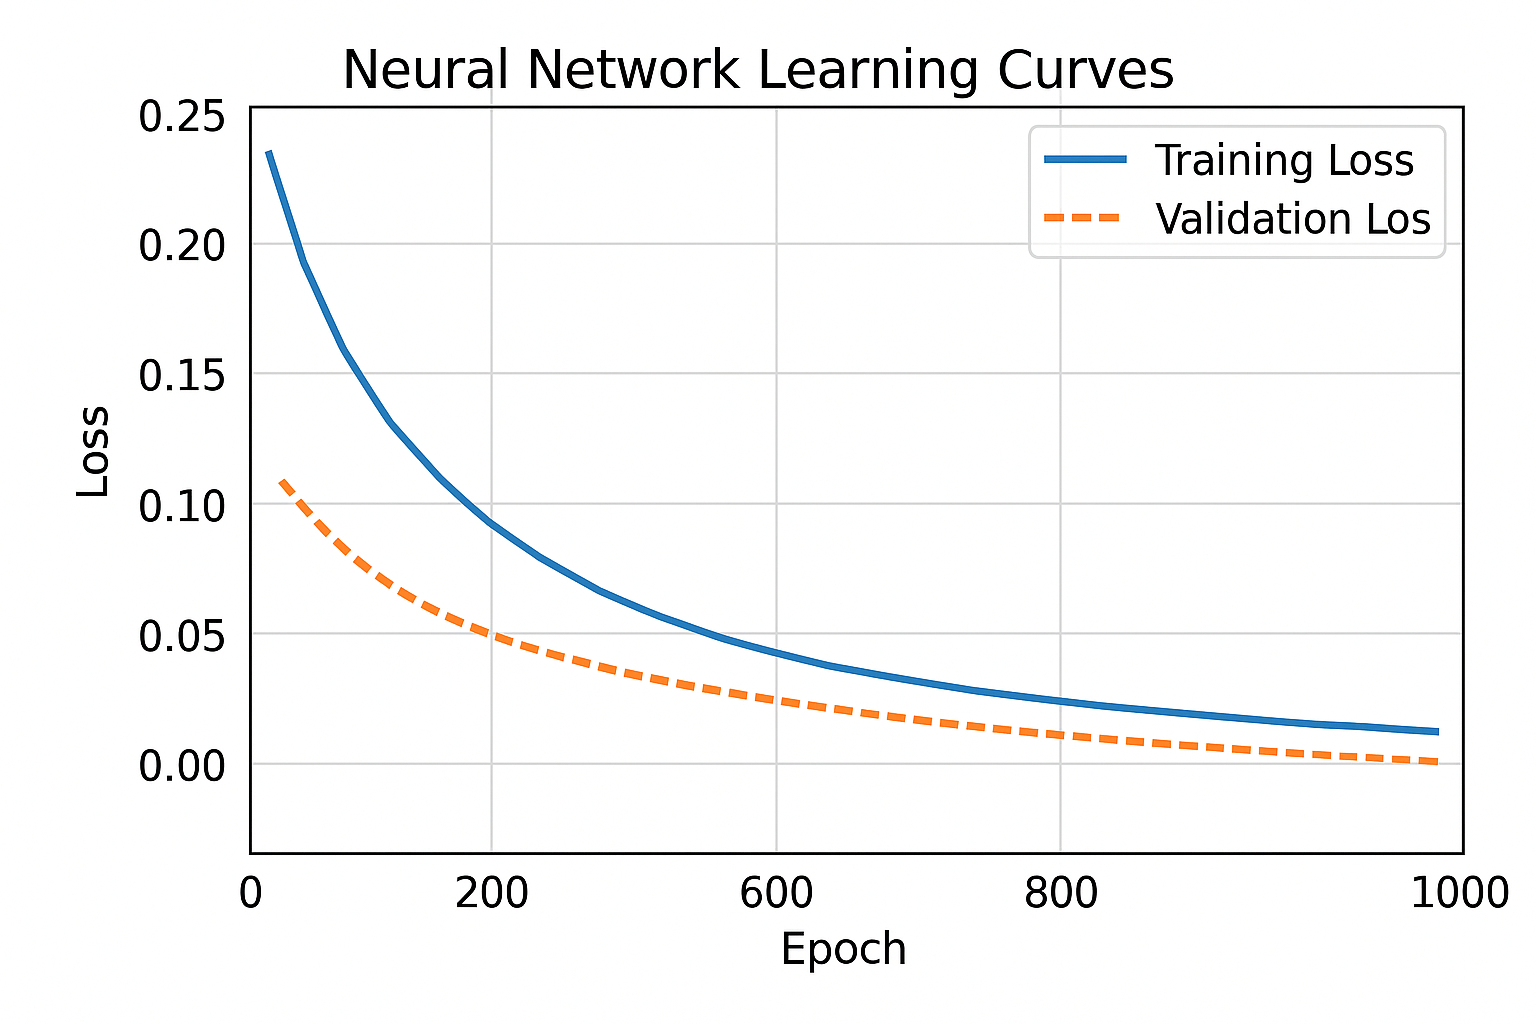

### **Exercício 3a** - O que poderia ser feito com a quantidade de iterações (epochs) para que o modelo continuasse melhorando em uma nova tentativa de treinamento?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Poderiamos aumentar o número máximo de epochs, já que a convergência lenta com erro ainda decrescendo indica que o modelo precisa de mais tempo para explorar o espaço de parâmetros e atingir um mínimo mais profundo.
O treinamento deve continuar até que o erro estabilize ou comece a aumentar (overfitting), o que justifica um limite superior mais generoso.
</span>


### **Exercício 3b** - O que poderia ser feito com a taxa de aprendizado para acelerar a convergência em uma nova tentativa de treinamento?

<span style="color:blue"> R: </span>

<span style="color:lightblue">
Como foi verificado que o erro decresce lentamente, uma taxa de aprendizado maior nos permitira dar passos mais largos no Gradient Descent, o que aceleraria a convergência. 
Mas o ideal mesmo seria usar uma técnica de ajuste automático, ou seja, começariamos com uma taxa de aprendizado mais alta  e iriamos reduzindo gradualemnte quando estivessemos próximo da convergência. 

Assim, as técnicas seriam:
- Decay Exponencial
- Step Decay
- Plateau Reduction

</span>

